In [346]:
####################
# Load Data #
####################

In [347]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from math import log, exp
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn import linear_model

In [348]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [349]:
# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']
# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [350]:
y_train_raw = train_df['SalePrice']
x_train_raw = train_df.drop('SalePrice', axis=1)
x_test_raw = test_df.copy()

In [351]:
#delete the loaded csv files
del train_df, test_df

In [352]:
#This function ta
def model_to_csv(model, x_test, test_ID, csv_name):
    y = model.predict(x_test)
    y = pd.Series([round(exp(x)) for x in y],name='SalePrice')
    y_out = pd.concat([test_ID, y], axis=1)
    y_out.to_csv('%s' % csv_name, index = False)

In [353]:
##############################
# Multi Linear Ridge Model_1 #
##############################

In [359]:
all_data = pd.concat([x_train_raw, x_test_raw])
all_data.shape

(2919, 79)

In [362]:
#call the impute function in process module
from preprocess import impute_multi_2
#all_data_imputed = impute_multi_2(all_data)

ImportError: cannot import name 'impute_multi_2'

In [356]:
#use one_hot encoding to dummify all the category data
one_hot_df = pd.get_dummies(all_data_imputed, drop_first=True, dummy_na=True)

In [311]:
#choose the first 1460 as train sample
x_train = one_hot_df.iloc[list(range(1460)),:]
#choose the first 1460 as train sample
x_test = one_hot_df.iloc[list(range(1460,2919)),:]

In [312]:
#y_train transformation
y_train = [log(x) for x in y_train_raw]

In [313]:
#tranform x**0.5
x_train['LotArea'] =[x**0.5 for x in x_train.LotArea]
x_train['LotFrontage']=[x**0.5 for x in x_train.LotFrontage]
x_train['MasVnrArea']=[x**0.5 for x in x_train['MasVnrArea']]
x_train['BsmtFinSF1']=[x**0.5 for x in x_train.BsmtFinSF1]
x_train['BsmtUnfSF']=[x**0.5 for x in x_train.BsmtUnfSF]
x_train['TotalBsmtSF']=[x**0.5 for x in x_train.TotalBsmtSF]
x_train['1stFlrSF']=[x**0.5 for x in x_train['1stFlrSF']]
#transform x**0.5
x_train['2ndFlrSF']=[x**0.5 for x in x_train['2ndFlrSF']]
x_train['GrLivArea']=[x**0.5 for x in x_train['GrLivArea']]
x_train['GarageArea']=[x**0.5 for x in x_train['GarageArea']]
x_train['TotalSF']=[x**0.5 for x in x_train['TotalSF']]
x_train['OpenPorchSF']=[x**0.5 if x>0 else x for x in x_train['OpenPorchSF']]
x_train['WoodDeckSF']=[x**0.5 if x>0 else x for x in x_train['WoodDeckSF']]

In [314]:
#test set transformation
x_test['LotArea'] =[x**0.5 for x in x_test.LotArea]
x_test['LotFrontage']=[x**0.5 for x in x_test.LotFrontage]
x_test['MasVnrArea']=[x**0.5 for x in x_test['MasVnrArea']]
x_test['BsmtFinSF1']=[x**0.5 for x in x_test.BsmtFinSF1]
x_test['BsmtUnfSF']=[x**0.5 for x in x_test.BsmtUnfSF]
x_test['TotalBsmtSF']=[x**0.5 for x in x_test.TotalBsmtSF]
x_test['1stFlrSF']=[x**0.5 for x in x_test['1stFlrSF']]
#test set transformation
x_test['2ndFlrSF']=[x**0.5 for x in x_test['2ndFlrSF']]
x_test['GrLivArea']=[x**0.5 for x in x_test['GrLivArea']]
x_test['GarageArea']=[x**0.5 for x in x_test['GarageArea']]
x_test['TotalSF']=[x**0.5 for x in x_test['TotalSF']]
x_test['OpenPorchSF']=[x**0.5 if x>0 else x for x in x_test['OpenPorchSF']]
x_test['WoodDeckSF']=[x**0.5 if x>0 else x for x in x_test['WoodDeckSF']]

In [315]:
alphas = np.logspace(-1, 0.1, 30)

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


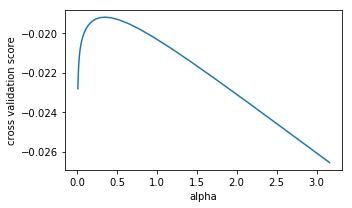

In [333]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-2, 0.5, 30)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Ridge(alpha, normalize=True), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [334]:
np.argmax(scores)

18

In [335]:
alphas[18]

0.35622478902624444

In [340]:
ridge_1st = linear_model.Ridge(alphas[18], normalize=True)

In [341]:
ridge_1st.fit(x_train, y_train)

Ridge(alpha=0.35622478902624444, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [342]:
ridge_1st.score(x_train, y_train)

0.92268209164525739

In [343]:
model_to_csv(ridge_1st, x_test, test_ID, 'mul_ridge_1st.csv')

In [ ]:
###############################
## Muti_Linear_Lasso_Model_1 ##
###############################

In [ ]:
kfold_lasso= range(1,6)
alphas_lasso = np.logspace(-2, 4, 50)
coef_lasso = []
las = linear_model.Lasso(alpha=alphas_lasso)
for k in kfold:
    
    

In [344]:
plt.close()

NameError: name 'df' is not defined

In [299]:
#temp=pd.concat([pd.DataFrame(ridge_1st.coef_),pd.DataFrame(x_test.columns)], axis=1)
#temp.loc[abs(temp.iloc[:,0])>0.03,:]